# Fake News Detecting System based on Data provided

In [1]:
#Making all the required imports

import nltk 
import pandas as pd 
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
import string

data = pd.read_csv("news.csv")

data[260:300]



C:\Users\Shramana\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,title,text,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,#NAME?,” says the New York Times’ Editorial Board. “F...,legal obstructions and the threat of violence...,however intimidating the process and long the...,here is a question from the future: In 2016 w...,minimize the damage,save the foundations,clear the mess.”,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,"-- """"The Wall Street Journal hasn’t endorsed a...",and if we didn’t endorse Ronald Reagan we are...,the Journal’s board declares. “A broken Washi...,and who better to do it than an outsider beho...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,#NAME?,widening an investigation into the bizarre “s...,tens of thousands of people gathered in the c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,#NAME?,U.S. backed force in Syria launched an offens...,seeking to drive out Islamic State militants ...,Hugh Naylor writes. And the impending assault...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,-- As Chicago battles its highest rate of homi...,police are solving fewer cases than they have...,where levels averaged 80 percent. (Kimbriell ...,Wesley Lowery and Steven Rich),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.shape

(7795, 141)

Cleaning the Data

In [3]:
#The dataset is cleaned 

df = data[data['label'].isin(['REAL', 'FAKE']) ]
a=(df['label'].value_counts()/len(df['label']))*100

a

REAL    50.055424
FAKE    49.944576
Name: label, dtype: float64

<AxesSubplot:ylabel='Frequency'>

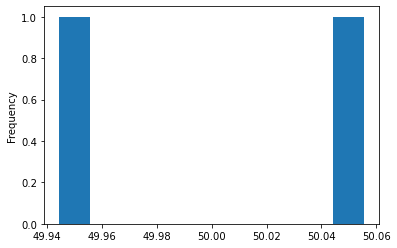

In [4]:
a.plot.hist()

In [5]:
# To drop rows which have only Null values
df.dropna(how='all', axis=1, inplace=True)

<ipython-input-5-c103f6c2e0bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how='all', axis=1, inplace=True)


In [6]:
df[260:400]

,Unnamed: 0,title,text,label
304,7892,Comment on Breaking: CDC Blocks Testimony of T...,Have you heard of Dr. William Thompson? If y...,FAKE
305,9935,FOX News Just Admitted It Made Up Story About ...,Comments \nThe alt-right and other Trump suppo...,FAKE
306,6810,Repudiating the Media,Q. If Trump wins can it be considered a repudi...,FAKE
307,5847,Buchanan Smashes CNN Shill,"October 27, 2016 \nI don't think it's possible...",FAKE
308,7815,The Impossible Is Happening: Cubs Win World Se...,I’m running on about an hour and a half of sle...,FAKE
...,...,...,...,...
570,4261,GOP presidential candidates hammer on 'top sec...,The Republican presidential candidates are sei...,REAL
571,2640,"Cleveland, Justice Department Reach Policing Deal",Cleveland has reached a settlement with the De...,REAL
572,10454,Physicists Say Consciousness Should Be Conside...,advertisement - learn more It’s been more than...,FAKE
573,4477,"A GOP Weekend, Courtesy Of The Koch Network An...","A GOP Weekend, Courtesy Of The Koch Network An...",REAL


In [7]:
# There are some text values which have only spaces. For Example:
df['text'][106]

' '

In [8]:
#To identify such texts as in row 106 and return a true or false which is stored in the column 'empty'

def empty(text):
    return text.isspace()
df['empty']=df['text'].apply(lambda x: empty(x))   


<ipython-input-8-47a737ba73f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['empty']=df['text'].apply(lambda x: empty(x))


In [9]:
#We get a column which stores a true or a false value based on whether the text column value is empty

print(df['empty'].value_counts())

print(len(df['empty']))

False    6279
True       36
Name: empty, dtype: int64
6315


In [10]:
#List 'l' stores the index value corresponding to the empty text values

l=(df[df['empty']==True].index).tolist()

In [11]:
#To store the title value into the text and replace the space.

for i in l:
    df['text'][i]=df['title'][i]

<ipython-input-11-1a62c87518d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i]=df['title'][i]
C:\Users\Shramana\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
df[df['empty']==True]

,Unnamed: 0,title,text,label,empty
106,5530,The Arcturian Group by Marilyn Raffaele Octobe...,The Arcturian Group by Marilyn Raffaele Octobe...,FAKE,True
1011,8332,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,FAKE,True
1107,9314,Southern Poverty Law Center Targets Anti-Jihad...,Southern Poverty Law Center Targets Anti-Jihad...,FAKE,True
1227,10304,Refugee Resettlement Watch: Swept Away In Nort...,Refugee Resettlement Watch: Swept Away In Nort...,FAKE,True
1248,9474,Michael Bloomberg Names Technological Unemploy...,Michael Bloomberg Names Technological Unemploy...,FAKE,True
2170,5802,Alert News : Putins Army Is Coming For World W...,Alert News : Putins Army Is Coming For World W...,FAKE,True
2242,9564,An LDS Reader Takes A Look At Trump Accuser Je...,An LDS Reader Takes A Look At Trump Accuser Je...,FAKE,True
2357,5752,America’s Senator Jeff Sessions Warns of Worse...,America’s Senator Jeff Sessions Warns of Worse...,FAKE,True
2389,8816,Paris Migrant Campers Increase after Calais Is...,Paris Migrant Campers Increase after Calais Is...,FAKE,True
2447,7525,Putins Army is coming for World war 3 against ...,Putins Army is coming for World war 3 against ...,FAKE,True


In [13]:
del df['empty']

In [14]:
df.shape

(6315, 4)

In [15]:
#This dataframe consists of that subpart of the data which is does not have proper 'label' classification
df_new= data[~data['label'].isin(['REAL', 'FAKE'])]

In [16]:
#Treating the NA values
df_new=df_new.dropna(how='all').fillna("")

df_new.head()

,Unnamed: 0,title,text,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140
256,5199,The Daily 202: Many African Americans unenthus...,"RALEIGH, N.C.—Ayana McAllister went to Hillary...",,,,,,,,...,,,,,,,,,,
257,g campaign … the epic dark saga will unfold th...,filled with fear and insecurity,created a hatemongering character and followe...,filled with fear and insecurity,hunkered down and repeated bad patterns rathe...,bold way,” Maureen Dowd writes. “Before he jumped into ...,Trump was seen as bombastic,vulgar,a bit of a buffoon and a cave man,...,,,,,,,,,,
259,#NAME?,part two”: “Bill Clinton’s Presidency was def...,for the most part,by criminal and congressional investigations,” he writes. “The subjects of those probes sou...,Filegate,Travelgate … It may be that Republicans spent...,and the nation was at peace. So Congress took...,notwithstanding the lack of interest among de...,threatens apocalyptic change. A politics base...,...,,,,,,,,,,
261,#NAME?,” says the New York Times’ Editorial Board. “F...,legal obstructions and the threat of violence...,however intimidating the process and long the...,here is a question from the future: In 2016 w...,minimize the damage,save the foundations,clear the mess.”,,,...,,,,,,,,,,
263,"-- """"The Wall Street Journal hasn’t endorsed a...",and if we didn’t endorse Ronald Reagan we are...,the Journal’s board declares. “A broken Washi...,and who better to do it than an outsider beho...,,,,,,,...,,,,,,,,,,


In [17]:
df_new.shape

(1261, 141)

In [18]:
df1=pd.DataFrame()

In [19]:
#stores the whole text that is present across the columns into the text column
for i in range(0,1261):
    df1.loc[i, ['text']] = df_new.iloc[i].to_string(index=False).strip()

In [20]:
df1.head()

,text
0,5199\nThe Daily 202: Many African Americans un...
1,g campaign … the epic dark saga will unfold th...
2,#NAME?\n part two”: “Bill Clinton’s Presidency...
3,#NAME?\n” says the New York Times’ Editorial B...
4,"-- """"The Wall Street Journal hasn’t endorsed a..."


In [21]:
#Replacing the new line characters with spaces
df1['text'] = df1['text'].replace('\n',' ', regex=True)

In [22]:
#Dropping such texts which have no value in them and are equal to "" with length 0
for i in range(0,1261):
    if str(df1['text'][i])=="":
        df1.drop(i,axis=0,inplace=True)

In [23]:
df1[106:120]

,text
107,",REAL\n9521,Jews ‘blamed for Holocaust’ at Hou..."
108,Israel has condemned a “shameful” event hosted...
109,The session marked the launch of the Balfour A...
110,A spokesperson for the Israeli embassy said th...
111,According to the Times an audience member was...
112,“[He] made the boycott on Germany the econ...
113,Read more
114,The speaker also said Rabbi Wise told the New ...
115,The audience member – reportedly a member of t...
116,“Just as the so-called Jewish state in Palesti...


Pre Processing Data

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
#Identifying the useless words in text and storing them in the list named stopwords

stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
#For Stemming and converting the text into its root form

ps = nltk.PorterStemmer() 

#Function to calculate the percentage of punctuations in text
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
 
#For the labelled dataset      
df['body_len'] = df['text'].apply(lambda x: len(x) - x.count(" "))
df['punct%'] = df['text'].apply(lambda x: count_punct(x))

#For the unlabelled dataset
df1['body_len'] = df1['text'].apply(lambda x: len(x) - x.count(" "))
df1['punct%'] = df1['text'].apply(lambda x: count_punct(x))

#to return a text after stemming without any punctuations or stopwords

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #puts into the text variable if its a word
    tokens = re.split('\W+', text) #splits a string based on a regular expression pattern
    text = [ps.stem(word) for word in tokens if word not in stopwords] #stores the word in text variable if it is not a stopword
    return text


<ipython-input-26-5bff7e57c60f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body_len'] = df['text'].apply(lambda x: len(x) - x.count(" "))
<ipython-input-26-5bff7e57c60f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['punct%'] = df['text'].apply(lambda x: count_punct(x))


In [27]:
df.head()

,Unnamed: 0,title,text,label,body_len,punct%
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,6221,1.7
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2201,2.9
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2121,2.0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2257,3.5
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1534,4.2


In [28]:
df1.head()

,text,body_len,punct%
0,5199 The Daily 202: Many African Americans une...,92,10.9
1,g campaign … the epic dark saga will unfold th...,522,5.7
2,#NAME? part two”: “Bill Clinton’s Presidency ...,393,6.4
3,#NAME? ” says the New York Times’ Editorial Bo...,222,8.1
4,"-- """"The Wall Street Journal hasn’t endorsed a...",167,10.2


In [29]:
#Split into train and test

from sklearn.model_selection import train_test_split

#for the labelled dataset to fit the model and test the accuracy
X=df[['text', 'body_len', 'punct%']]
y=df['label']

#for classifying the unlabelled dataset 
X_new=df1[['text', 'body_len', 'punct%']]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
#Vectorize text for both labelled and unlabelled datasets

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['text']) #The train text values passes gets converted to a matrix of TF-IDF features

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit_new = tfidf_vect.fit(X_new['text'])

#Transform a count matrix to a normalized tf or tf-idf representation.

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])


tfidf_new = tfidf_vect_fit.transform(X_new['text'])

#Vectorized text
X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_vect_new = pd.concat([X_new[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_new.toarray())], axis=1)

print(X_train_vect.head(2))
print(X_vect_new.head(2))

   body_len  punct%         0    1    2    3    4    5    6    7  ...  52927  \
0      6295     3.7  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
1       928     3.2  0.045871  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   

   52928  52929  52930  52931  52932  52933  52934  52935  52936  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[2 rows x 52939 columns]
   body_len  punct%         0    1    2    3    4    5    6    7  ...  52927  \
0        92    10.9  0.162903  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
1       522     5.7  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   

   52928  52929  52930  52931  52932  52933  52934  52935  52936  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[2 rows x 52939 columns]


In [35]:
#Final Evaluation of Models

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Precision: 0.908 / Recall: 0.942 / F1-Score: 0.924 / Accuracy: 0.925


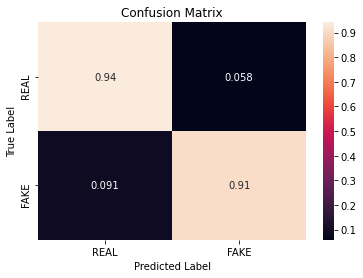

In [37]:
#Fitting the Random Forest Classifier to Dataset

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)

#Predicting the 'label' values for the test dataset
y_pred = rf_model.predict(X_test_vect)

#Predicting the 'label' values for the unlabelled dataset
y_pred_new=rf_model.predict(X_vect_new)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='FAKE', average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = ["REAL", "FAKE"]
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #Normalized confusion matrix
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() 

In [41]:
y_pred_new=pd.DataFrame(y_pred_new)
y_pred_new[0].value_counts()

FAKE    1252
REAL       8
Name: 0, dtype: int64

# THE END